In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
from collections import Counter
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

sb.set_style("whitegrid")
#sb.set_style("dark")

#statistical test
from scipy.stats import f_oneway
from scipy.stats import ttest_ind 

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [2]:
ddf = pd.read_csv('day.csv', delimiter = ',') 

In [3]:
ddf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [39]:
ddf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [40]:
ddf["season"].value_counts()  

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [41]:
ddf["weathersit"].value_counts()  

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [43]:
ddf["dteday"]= pd.to_datetime(ddf["dteday"])

In [44]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### diving temperature

(t-t_min)/(t_max-t_min), t_min=-8, t_max=+39

In [4]:
ddf.temp = ddf.temp*47 - 8

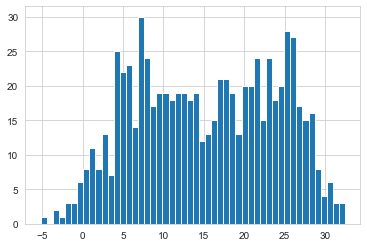

In [5]:
ddf.temp.hist(bins= 50);

In [6]:
ddf.temp.max()

32.498349

In [7]:
ddf.temp.min()

-5.2208711999999995

In [8]:
ddf.loc[ddf['temp'] <=9, 'tmp_lvl']  = 'cold'
#df.loc[df['temp'] >= 25, :] 

In [9]:
ddf.loc[ddf['temp'] >= 25, 'tmp_lvl']  = 'hot'

In [10]:
ddf.loc[(ddf['temp'] < 25) & ( ddf['temp'] > 8), 'tmp_lvl']  = 'warm'

In [11]:
ddf.tmp_lvl.value_counts()

warm    418
cold    186
hot     127
Name: tmp_lvl, dtype: int64

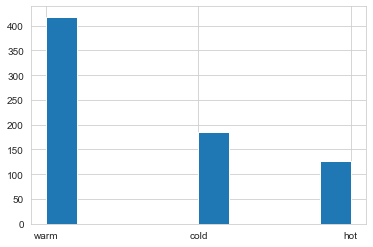

In [12]:
ddf.tmp_lvl.hist();

In [13]:
ddf['weathersit_1'] = ddf['weathersit'].apply(lambda x : "Clear-Cloudy" if x==1 else "Mist-Cloudy" if x == 2 else "Light Rainy-Snowy" if x == 3 else "Heavy Rain-Snowy")   

In [14]:
ddf['season_1'] = ddf['season'].apply(lambda x : "Winter" if x==1 else "Spring" if x == 2 else "Summer" if x == 3 else "Fall")   

In [15]:
ddf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tmp_lvl,weathersit_1,season_1
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,0.363625,0.805833,0.160446,331,654,985,warm,Mist-Cloudy,Winter
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,0.353739,0.696087,0.248539,131,670,801,warm,Mist-Cloudy,Winter
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,0.189405,0.437273,0.248309,120,1229,1349,cold,Clear-Cloudy,Winter
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,0.212122,0.590435,0.160296,108,1454,1562,cold,Clear-Cloudy,Winter
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,0.229270,0.436957,0.186900,82,1518,1600,cold,Clear-Cloudy,Winter


In [16]:
ddf['weekday_1'] = ddf['weekday'].apply(lambda x : "Monday" if x==1 else "Tuesday" if x == 2 else "Wednesday" if x == 3 else "Thursday" if x == 4 else "Friday" if x == 5 else "Saturday" if x == 6 else "Sunday")   

In [17]:
ddf['workingday_1'] = ddf['workingday'].apply(lambda x : "Working Day" if x==1 else "Not Working Day" )   

In [18]:
ddf

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,tmp_lvl,weathersit_1,season_1,weekday_1,workingday_1
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,...,0.805833,0.160446,331,654,985,warm,Mist-Cloudy,Winter,Saturday,Not Working Day
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,...,0.696087,0.248539,131,670,801,warm,Mist-Cloudy,Winter,Sunday,Not Working Day
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,...,0.437273,0.248309,120,1229,1349,cold,Clear-Cloudy,Winter,Monday,Working Day
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,...,0.590435,0.160296,108,1454,1562,cold,Clear-Cloudy,Winter,Tuesday,Working Day
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,...,0.436957,0.186900,82,1518,1600,cold,Clear-Cloudy,Winter,Wednesday,Working Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,3.945849,...,0.652917,0.350133,247,1867,2114,cold,Mist-Cloudy,Winter,Thursday,Working Day
727,728,2012-12-28,1,1,12,0,5,1,2,3.906651,...,0.590000,0.155471,644,2451,3095,cold,Mist-Cloudy,Winter,Friday,Working Day
728,729,2012-12-29,1,1,12,0,6,0,2,3.906651,...,0.752917,0.124383,159,1182,1341,cold,Mist-Cloudy,Winter,Saturday,Not Working Day
729,730,2012-12-30,1,1,12,0,0,0,1,4.024151,...,0.483333,0.350754,364,1432,1796,cold,Clear-Cloudy,Winter,Sunday,Not Working Day


In [19]:
ddf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'tmp_lvl', 'weathersit_1', 'season_1',
       'weekday_1', 'workingday_1'],
      dtype='object')

In [20]:
df1 = pd.melt(ddf, id_vars=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'tmp_lvl','season_1', 'weekday_1', "workingday_1", "weathersit_1"], value_vars=["casual", "registered"]).sort_values(by = "dteday").reset_index (drop = True)

In [21]:
ddf_merged = pd.melt(ddf, id_vars=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'tmp_lvl','season_1', 'weekday_1', "workingday_1", "weathersit_1"], value_vars=["casual", "registered"]).sort_values(by = "dteday").reset_index (drop = True)

In [22]:
df1

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,tmp_lvl,season_1,weekday_1,workingday_1,weathersit_1,variable,value
0,2011-01-01,1,0,1,0,6,0,2,8.175849,0.363625,0.805833,0.160446,985,warm,Winter,Saturday,Not Working Day,Mist-Cloudy,casual,331
1,2011-01-01,1,0,1,0,6,0,2,8.175849,0.363625,0.805833,0.160446,985,warm,Winter,Saturday,Not Working Day,Mist-Cloudy,registered,654
2,2011-01-02,1,0,1,0,0,0,2,9.083466,0.353739,0.696087,0.248539,801,warm,Winter,Sunday,Not Working Day,Mist-Cloudy,registered,670
3,2011-01-02,1,0,1,0,0,0,2,9.083466,0.353739,0.696087,0.248539,801,warm,Winter,Sunday,Not Working Day,Mist-Cloudy,casual,131
4,2011-01-03,1,0,1,0,1,1,1,1.229108,0.189405,0.437273,0.248309,1349,cold,Winter,Monday,Working Day,Clear-Cloudy,casual,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2012-12-29,1,1,12,0,6,0,2,3.906651,0.242400,0.752917,0.124383,1341,cold,Winter,Saturday,Not Working Day,Mist-Cloudy,casual,159
1458,2012-12-30,1,1,12,0,0,0,1,4.024151,0.231700,0.483333,0.350754,1796,cold,Winter,Sunday,Not Working Day,Clear-Cloudy,registered,1432
1459,2012-12-30,1,1,12,0,0,0,1,4.024151,0.231700,0.483333,0.350754,1796,cold,Winter,Sunday,Not Working Day,Clear-Cloudy,casual,364
1460,2012-12-31,1,1,12,0,1,1,2,2.144151,0.223487,0.577500,0.154846,2729,cold,Winter,Monday,Working Day,Mist-Cloudy,casual,439


In [23]:
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,tmp_lvl,season_1,weekday_1,workingday_1,weathersit_1,variable,value
0,2011-01-01,1,0,1,0,6,0,2,8.175849,0.363625,0.805833,0.160446,985,warm,Winter,Saturday,Not Working Day,Mist-Cloudy,casual,331
1,2011-01-01,1,0,1,0,6,0,2,8.175849,0.363625,0.805833,0.160446,985,warm,Winter,Saturday,Not Working Day,Mist-Cloudy,registered,654
2,2011-01-02,1,0,1,0,0,0,2,9.083466,0.353739,0.696087,0.248539,801,warm,Winter,Sunday,Not Working Day,Mist-Cloudy,registered,670
3,2011-01-02,1,0,1,0,0,0,2,9.083466,0.353739,0.696087,0.248539,801,warm,Winter,Sunday,Not Working Day,Mist-Cloudy,casual,131
4,2011-01-03,1,0,1,0,1,1,1,1.229108,0.189405,0.437273,0.248309,1349,cold,Winter,Monday,Working Day,Clear-Cloudy,casual,120


In [24]:
df2 = df1.groupby(['variable', 'dteday'])['value'].sum().reset_index()

In [25]:
#sb.lineplot(x = "dteday", y = 'value', data = df2, hue = 'variable');

In [26]:
df3 = df1.groupby(['variable', 'mnth'])['value'].sum().reset_index()
df3

,variable,mnth,value
0,casual,1,12042
1,casual,2,14963
2,casual,3,44444
3,casual,4,60802
4,casual,5,75285
5,casual,6,73906
6,casual,7,78157
7,casual,8,72039
8,casual,9,70323
9,casual,10,59760


In [29]:
df3 = df1.groupby(['variable', 'mnth'])['value'].sum().reset_index()
df3

,variable,mnth,value
0,casual,1,12042
1,casual,2,14963
2,casual,3,44444
3,casual,4,60802
4,casual,5,75285
5,casual,6,73906
6,casual,7,78157
7,casual,8,72039
8,casual,9,70323
9,casual,10,59760


# Membership Profile

In [31]:
ddf.sum(axis=0)

instant                                                    267546
dteday          2011-01-012011-01-022011-01-032011-01-042011-0...
season                                                       1825
yr                                                            366
mnth                                                         4766
holiday                                                        21
weekday                                                      2191
workingday                                                    500
weathersit                                                   1020
temp                                                      11171.9
atemp                                                     346.753
hum                                                       458.991
windspeed                                                 139.245
casual                                                     620017
registered                                                2672662
cnt       

In [32]:
ddf_pie = ddf[["casual" , "registered"]]

In [33]:
ddf_pie_sum = ddf_pie.sum(axis=0)

In [34]:
display (ddf_pie_sum)

casual         620017
registered    2672662
dtype: int64

In [35]:
pd.DataFrame(ddf_pie_sum).T

,casual,registered
0,620017,2672662


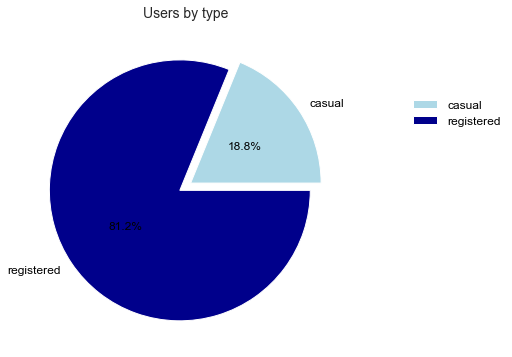

In [36]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
color_palette_list = ['lightblue', 'darkblue']
labels = ddf_pie_sum.keys()
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'white'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['font.size']=12
plt.pie(startangle=0, x=ddf_pie_sum, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5, colors=color_palette_list)
plt.title("Users by type", fontsize=14);
#pie.savefig("DeliveryPieChart.png")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

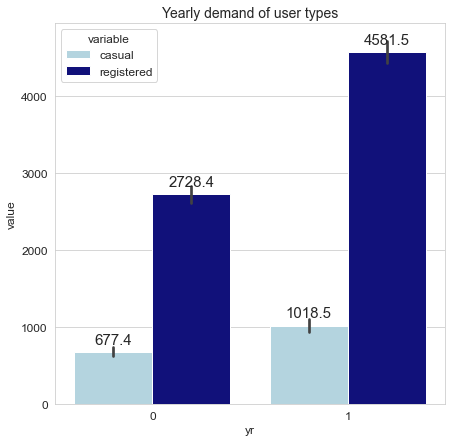

In [105]:
sb.set_style("whitegrid")
plt.figure(figsize=(7, 7))
color= ["lightblue", "darkblue"]
splot= sb.barplot(x="yr", y="value", hue="variable", data=ddf_merged, palette= color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, +12), 
                   textcoords = 'offset points')
plt.title("Yearly demand of user types", fontsize=14);

<Figure size 720x432 with 0 Axes>

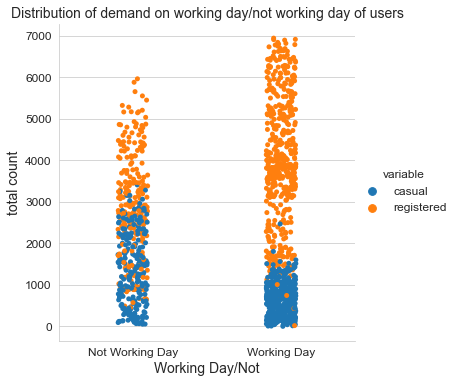

In [92]:
plt.figure(figsize=(10, 6))
sb.catplot(x = 'workingday_1', y = 'value', data = df1, hue = 'variable')
plt.title("Distribution of demand on working day/not working day of users", fontsize=14)
plt.ylabel("total count", size=14)
plt.xlabel("Working Day/Not", size=14);


### WEEKDAY

In [39]:
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,tmp_lvl,season_1,weekday_1,workingday_1,weathersit_1,variable,value
0,2011-01-01,1,0,1,0,6,0,2,8.175849,0.363625,0.805833,0.160446,985,warm,Winter,Saturday,Not Working Day,Mist-Cloudy,casual,331
1,2011-01-01,1,0,1,0,6,0,2,8.175849,0.363625,0.805833,0.160446,985,warm,Winter,Saturday,Not Working Day,Mist-Cloudy,registered,654
2,2011-01-02,1,0,1,0,0,0,2,9.083466,0.353739,0.696087,0.248539,801,warm,Winter,Sunday,Not Working Day,Mist-Cloudy,registered,670
3,2011-01-02,1,0,1,0,0,0,2,9.083466,0.353739,0.696087,0.248539,801,warm,Winter,Sunday,Not Working Day,Mist-Cloudy,casual,131
4,2011-01-03,1,0,1,0,1,1,1,1.229108,0.189405,0.437273,0.248309,1349,cold,Winter,Monday,Working Day,Clear-Cloudy,casual,120


In [40]:
ddf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,tmp_lvl,weathersit_1,season_1,weekday_1,workingday_1
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,...,0.805833,0.160446,331,654,985,warm,Mist-Cloudy,Winter,Saturday,Not Working Day
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,...,0.696087,0.248539,131,670,801,warm,Mist-Cloudy,Winter,Sunday,Not Working Day
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,...,0.437273,0.248309,120,1229,1349,cold,Clear-Cloudy,Winter,Monday,Working Day
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,...,0.590435,0.160296,108,1454,1562,cold,Clear-Cloudy,Winter,Tuesday,Working Day
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,...,0.436957,0.186900,82,1518,1600,cold,Clear-Cloudy,Winter,Wednesday,Working Day


In [41]:
ddf_weekdays = ddf.groupby(["weekday_1"]).sum()
ddf_weekdays ["weekdays"] = ddf_weekdays ['mnth'].apply(lambda x : "Monday" if x==682 else "Tuesday" if x == 674 else "Wednesday" if x == 677 else "Thursday" if x == 681 else "Friday" if x == 684 else "Saturday" if x == 688 else "Sunday") 
ddf_weekdays

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekdays
weekday_1,,,,,,,,,,,,,,,,
Friday,38220,259,52,684,2,520,102,145,1590.441194,48.995626,63.830598,19.384430,78238,409552,487790,Friday
Monday,38535,262,53,682,15,105,90,146,1595.172615,49.829085,66.945536,20.022517,70784,384719,455503,Monday
Saturday,38325,260,52,688,0,630,0,147,1538.857455,48.517498,65.053826,20.641691,153852,323955,477807,Saturday
Sunday,38430,261,53,680,0,0,0,137,1546.702239,48.855211,65.904171,19.795638,140521,303506,444027,Sunday
Thursday,38116,261,52,681,2,416,102,144,1633.221346,50.200829,63.387899,19.926720,61460,423935,485395,Thursday
Tuesday,37908,262,52,674,1,208,103,150,1632.930322,50.267030,66.750254,19.949832,57843,411266,469109,Tuesday
Wednesday,38012,260,52,677,1,312,103,151,1634.610008,50.087487,67.118276,19.524592,57319,415729,473048,Wednesday


In [42]:
ddf_weekdays

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekdays
weekday_1,,,,,,,,,,,,,,,,
Friday,38220,259,52,684,2,520,102,145,1590.441194,48.995626,63.830598,19.384430,78238,409552,487790,Friday
Monday,38535,262,53,682,15,105,90,146,1595.172615,49.829085,66.945536,20.022517,70784,384719,455503,Monday
Saturday,38325,260,52,688,0,630,0,147,1538.857455,48.517498,65.053826,20.641691,153852,323955,477807,Saturday
Sunday,38430,261,53,680,0,0,0,137,1546.702239,48.855211,65.904171,19.795638,140521,303506,444027,Sunday
Thursday,38116,261,52,681,2,416,102,144,1633.221346,50.200829,63.387899,19.926720,61460,423935,485395,Thursday
Tuesday,37908,262,52,674,1,208,103,150,1632.930322,50.267030,66.750254,19.949832,57843,411266,469109,Tuesday
Wednesday,38012,260,52,677,1,312,103,151,1634.610008,50.087487,67.118276,19.524592,57319,415729,473048,Wednesday


Text(0.5, 0, 'weekday')

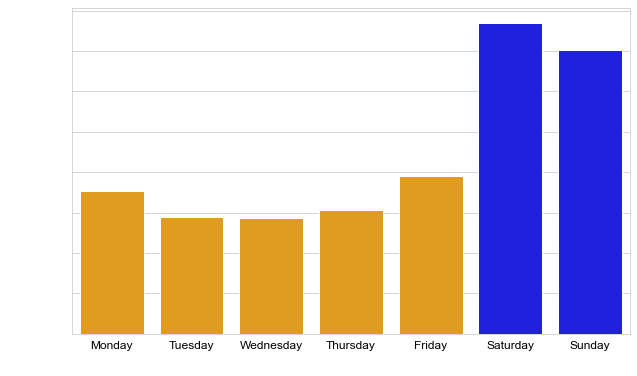

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(100000.0)) 
clrs = ['orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue']
ax = sb.barplot(x="weekdays", y="casual", data=ddf_weekdays, order = ("Monday" , "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"), palette = clrs);
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("casual", size=14)
plt.xlabel("weekday", size=14)
#plt.title("Fixed Acidity in Different Wine Types", size=18)
#plt.savefig("Fixed Acidity Quality.png")  #to save the figure

Text(0.5, 0, 'weekday')

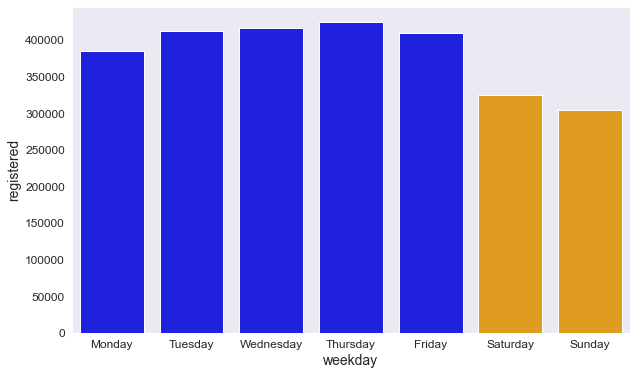

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(500000.0)) 
clrs = ['blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange']
ax = sb.barplot(x="weekdays", y="registered", data=ddf_weekdays, order = ("Monday" , "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"), palette = clrs)
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("registered", size=14)
plt.xlabel("weekday", size=14)
#plt.title("Fixed Acidity in Different Wine Types", size=18)
#plt.savefig("Fixed Acidity Quality.png")  #to save the figure

Text(0.5, 0, 'weekday')

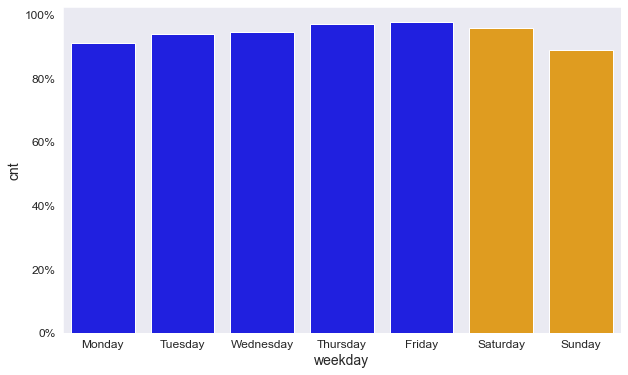

In [45]:
#values = np.array(ddf_weekdays.weekdays) 
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(500000.0)) 
clrs = ['blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange']
#sb.barplot(x="weekdays", y="cnt", data=ddf_weekdays, palette= clrs , order = ("Monday" , "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
ax = sb.barplot(x="weekdays", y="cnt", data=ddf_weekdays,order = ("Monday" , "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"),  palette= clrs )

#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("cnt", size=14)
plt.xlabel("weekday", size=14)
#plt.title("Fixed Acidity in Different Wine Types", size=18)
#plt.savefig("Fixed Acidity Quality.png")  #to save the figure

## Months

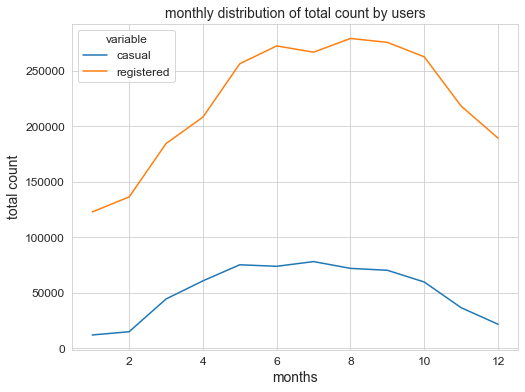

In [86]:
plt.figure(figsize=(8, 6))
sb.lineplot(x = 'mnth', y = 'value', data = df3, hue = 'variable')
plt.title("monthly distribution of total count by users", fontsize=14)
plt.ylabel("total count", size=14)
plt.xlabel("months", size=14);

Text(0.5, 0, 'months')

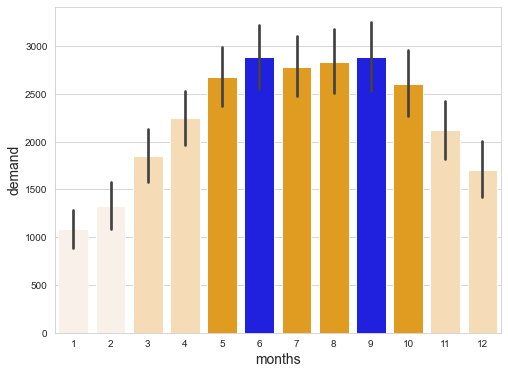

In [51]:
plt.figure(figsize=(8, 6))
clrs = ['linen', 'linen', 'navajowhite', 'navajowhite', 'orange', 'blue', 'orange', 'orange', 'blue','orange', 'navajowhite', 'navajowhite']
sb.barplot(x="mnth", y="value", data=df1, palette= clrs)
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("demand", size=14)
plt.xlabel("months", size=14)

Text(0.5, 0, 'months')

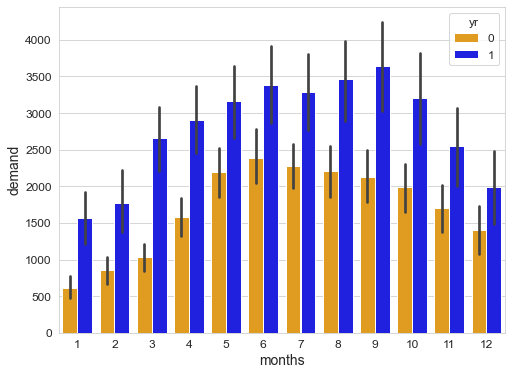

In [96]:
sb.set_style("whitegrid")
plt.figure(figsize=(8, 6))
clrs= ["orange","blue"]
sb.barplot(x="mnth", y="value", data=df1, hue="yr",  palette= clrs)
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("demand", size=14)
plt.xlabel("months", size=14)

Text(0.5, 0, 'months')

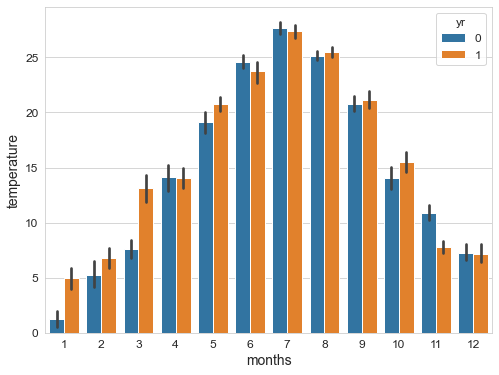

In [98]:
plt.figure(figsize=(8, 6))
sb.barplot(x="mnth", y="temp", data=df1, hue= "yr")
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("temperature", size=14)
plt.xlabel("months", size=14)

## SEASON

In [46]:
ddf_pie_season = df1["season_1"].value_counts()
ddf_pie_season

Summer    376
Spring    368
Winter    362
Fall      356
Name: season_1, dtype: int64

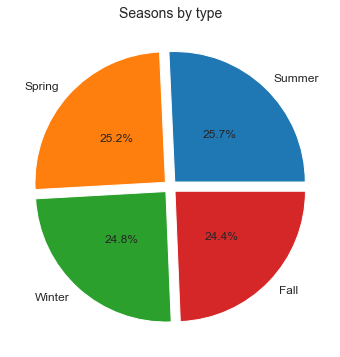

In [47]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ddf_pie_season .keys()
plt.pie(x=ddf_pie_season , autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Seasons by type", fontsize=14);

In [48]:
ddf.groupby(["season_1"]).mean()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season_1,,,,,,,,,,,,,,,
Fall,493.000000,4.0,0.500000,10.696629,0.033708,2.966292,0.679775,1.477528,11.876584,0.415539,0.668719,0.171995,729.112360,3999.050562,4728.162921
Spring,308.500000,2.0,0.500000,4.652174,0.021739,2.989130,0.695652,1.402174,17.587042,0.520307,0.626948,0.203507,1106.097826,3886.233696,4992.331522
Summer,401.500000,3.0,0.500000,7.691489,0.021277,3.031915,0.696809,1.297872,25.196537,0.655898,0.633482,0.172095,1202.611702,4441.691489,5644.303191
Winter,262.685083,1.0,0.502762,3.093923,0.038674,3.000000,0.662983,1.408840,5.994135,0.296914,0.582903,0.214537,334.928177,2269.204420,2604.132597


In [49]:
ddf_season= ddf.groupby(["season_1"]).sum()
ddf_season

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season_1,,,,,,,,,,,,,,,
Fall,87754,712,89,1904,6,528,121,263,2114.031925,73.965896,119.032013,30.615035,129782,711831,841613
Spring,56764,368,92,856,4,550,128,258,3236.015803,95.736548,115.358493,37.445312,203522,715067,918589
Summer,75482,564,94,1446,4,570,131,244,4736.949050,123.308898,119.094627,32.353864,226091,835038,1061129
Winter,47546,181,91,560,7,543,120,255,1084.938401,53.741424,105.505427,38.831210,60622,410726,471348


In [50]:
ddf_season ['seasons'] = ddf_season['yr'].apply(lambda x : "Spring" if x==92 else "Summer" if x == 94 else "Fall" if x == 89 else "Winter")   

In [51]:
ddf_season 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons
season_1,,,,,,,,,,,,,,,,
Fall,87754,712,89,1904,6,528,121,263,2114.031925,73.965896,119.032013,30.615035,129782,711831,841613,Fall
Spring,56764,368,92,856,4,550,128,258,3236.015803,95.736548,115.358493,37.445312,203522,715067,918589,Spring
Summer,75482,564,94,1446,4,570,131,244,4736.949050,123.308898,119.094627,32.353864,226091,835038,1061129,Summer
Winter,47546,181,91,560,7,543,120,255,1084.938401,53.741424,105.505427,38.831210,60622,410726,471348,Winter


Text(0.5, 0, 'seasons')

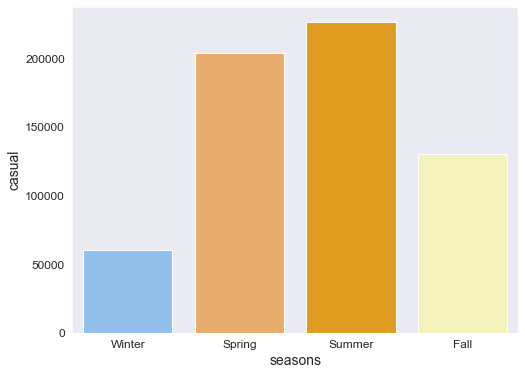

In [52]:
plt.figure(figsize=(8, 6))
clrs = ['#83bffb', '#fcac59', 'orange', '#fdfdb1']
sb.barplot(x="seasons", y="casual", data=ddf_season, palette = clrs, order = ["Winter", "Spring", "Summer", "Fall"])
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("casual", size=14)
plt.xlabel("seasons", size=14)
#plt.title("Fixed Acidity in Different Wine Types", size=18)
#plt.savefig("Fixed Acidity Quality.png")  #to save the figure

Text(0.5, 0, 'seasons')

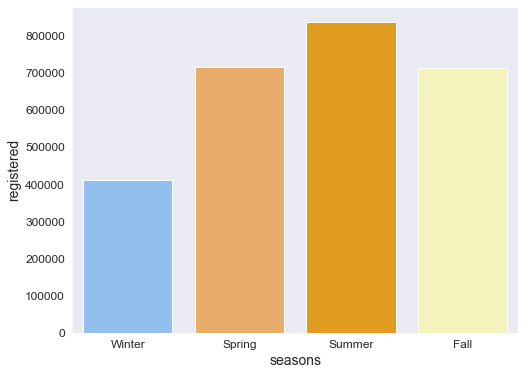

In [54]:
plt.figure(figsize=(8, 6))
clrs = ['#83bffb', '#fcac59', 'orange', '#fdfdb1']
sb.barplot(x="seasons", y="registered", data=ddf_season, palette= clrs, order = ["Winter", "Spring", "Summer", "Fall"])
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("registered", size=14)
plt.xlabel("seasons", size=14)

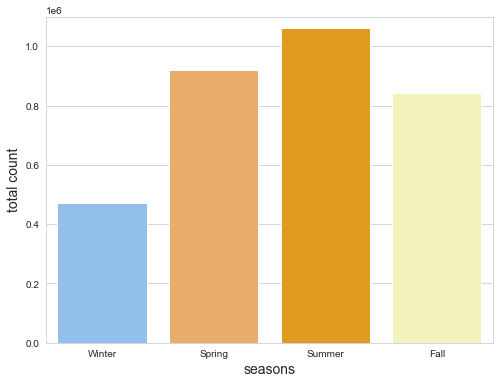

In [90]:
plt.figure(figsize=(8, 6))
clrs = ['#83bffb', '#fcac59', 'orange', '#fdfdb1']
sb.barplot(x="seasons", y="cnt", data=ddf_season, palette = clrs, order = ["Winter", "Spring", "Summer", "Fall"])
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("total count", size=14)
plt.xlabel("seasons", size=14)
plt.ylim(0, 1100000);

Text(0.5, 0, 'seasons')

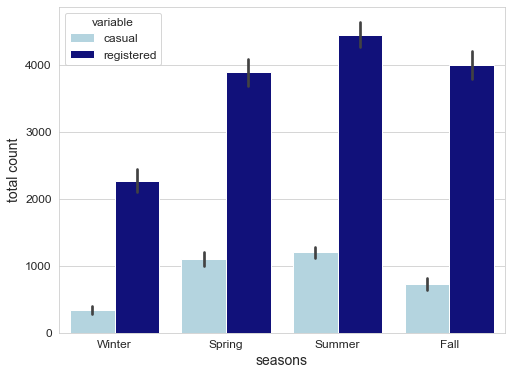

In [103]:
plt.figure(figsize=(8, 6))
clrs = ['lightblue', 'darkblue']
sb.barplot(x="season_1", y="value", data=ddf_merged, palette= clrs, hue= "variable")
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("total count", size=14)
plt.xlabel("seasons", size=14)

# Features

## season

In [71]:
ddf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,tmp_lvl,weathersit_1,season_1,weekday_1,workingday_1
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,...,0.805833,0.160446,331,654,985,warm,Mist-Cloudy,Winter,Saturday,Not Working Day
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,...,0.696087,0.248539,131,670,801,warm,Mist-Cloudy,Winter,Sunday,Not Working Day
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,...,0.437273,0.248309,120,1229,1349,cold,Clear-Cloudy,Winter,Monday,Workind Day
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,...,0.590435,0.160296,108,1454,1562,cold,Clear-Cloudy,Winter,Tuesday,Workind Day
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,...,0.436957,0.186900,82,1518,1600,cold,Clear-Cloudy,Winter,Wednesday,Workind Day


<AxesSubplot:xlabel='season', ylabel='temp'>

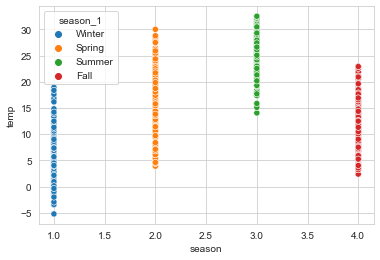

In [54]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.scatterplot(data=df1, x="season", y="temp", hue="season_1", ax=ax)
# temp is higher in summer and fall especially fall 

In [55]:
df1["season"].value_counts()

3    376
2    368
1    362
4    356
Name: season, dtype: int64

## Humidity

<AxesSubplot:xlabel='season', ylabel='hum'>

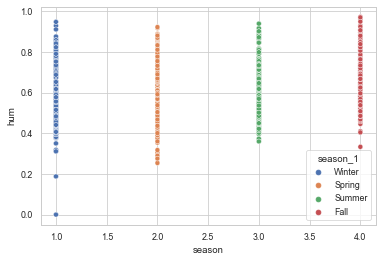

In [75]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.scatterplot(data=df1, x="season", y="hum", hue="season_1", ax=ax)
# HUM is higher in spring and winter especially fall 

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


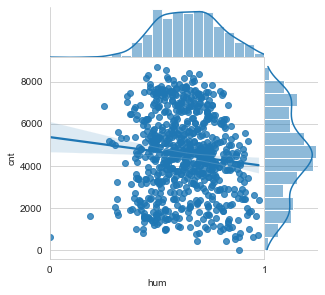

In [95]:
rj = sb.jointplot(x='hum', y='cnt', data=ddf,
kind='reg',
space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,2)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Alcohol - Quality', fontsize=12)

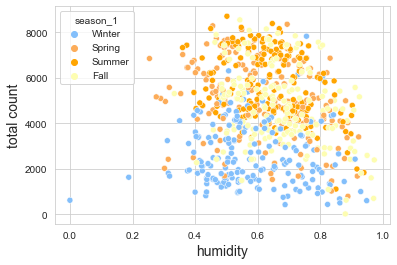

In [96]:
fig_dims = (6, 4)
clrs = ['#83bffb',  '#fcac59', 'orange', '#fdfdb1']
fig, ax = plt.subplots(figsize=fig_dims)
sb.scatterplot(data=ddf, x="hum", y="cnt", hue="season_1", ax=ax, palette = clrs)
plt.ylabel("total count", size=14)
plt.xlabel("humidity", size=14);

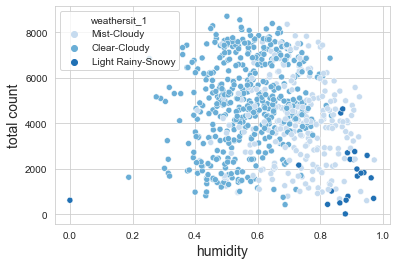

In [113]:
fig_dims = (6, 4)
#clrs = ['#83bffb',  '#fcac59', 'orange', '#fdfdb1']
fig, ax = plt.subplots(figsize=fig_dims)
sb.scatterplot(data=ddf, x="hum", y="cnt", hue="weathersit_1", ax=ax, palette = "Blues")
plt.ylabel("total count", size=14)
plt.xlabel("humidity", size=14);

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


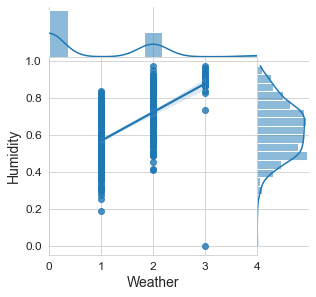

In [109]:
rj = sb.jointplot(x='weathersit', y='hum', data=ddf,
kind='reg',
space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,5)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
plt.ylabel("Humidity", size=14)
plt.xlabel("Weather", size=14);

<AxesSubplot:xlabel='hum', ylabel='cnt'>

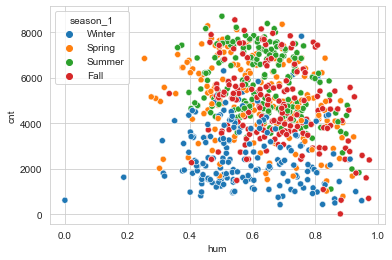

In [58]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.scatterplot(data=df1, x="hum", y="cnt", hue="season_1", ax=ax)

## temperature 

In [57]:
df1.sort_values(by = "temp")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,tmp_lvl,season_1,weekday_1,workingday_1,weathersit_1,variable,value
43,2011-01-22,1,0,1,0,6,0,1,-5.220871,0.079070,0.400000,0.171970,981,cold,Winter,Saturday,Not Working Day,Clear-Cloudy,casual,93
42,2011-01-22,1,0,1,0,6,0,1,-5.220871,0.079070,0.400000,0.171970,981,cold,Winter,Saturday,Not Working Day,Clear-Cloudy,registered,888
45,2011-01-23,1,0,1,0,0,0,1,-3.463480,0.098839,0.436522,0.246600,986,cold,Winter,Sunday,Not Working Day,Clear-Cloudy,casual,150
44,2011-01-23,1,0,1,0,0,0,1,-3.463480,0.098839,0.436522,0.246600,986,cold,Winter,Sunday,Not Working Day,Clear-Cloudy,registered,836
46,2011-01-24,1,0,1,0,1,1,1,-3.422609,0.117930,0.491739,0.158330,1416,cold,Winter,Monday,Workind Day,Clear-Cloudy,casual,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2011-07-22,3,0,7,0,5,1,1,31.871651,0.840896,0.580417,0.133100,3387,hot,Summer,Friday,Workind Day,Clear-Cloudy,registered,2825
406,2011-07-23,3,0,7,0,6,0,1,31.910849,0.804287,0.500000,0.131221,3285,hot,Summer,Saturday,Not Working Day,Clear-Cloudy,registered,2298
407,2011-07-23,3,0,7,0,6,0,1,31.910849,0.804287,0.500000,0.131221,3285,hot,Summer,Saturday,Not Working Day,Clear-Cloudy,casual,987
1106,2012-07-07,3,1,7,0,6,0,1,32.498349,0.804913,0.492083,0.163554,4840,hot,Summer,Saturday,Not Working Day,Clear-Cloudy,registered,3392


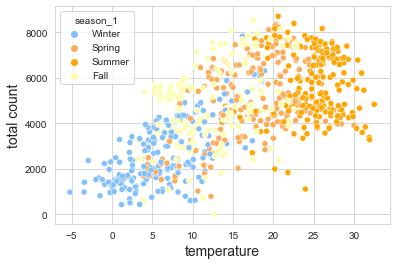

In [65]:
fig_dims = (6, 4)
clrs = ['#83bffb',  '#fcac59', 'orange', '#fdfdb1']
fig, ax = plt.subplots(figsize=fig_dims)
sb.scatterplot(data=ddf, x="temp", y="cnt", hue="season_1", ax=ax, palette = clrs)
plt.ylabel("total count", size=14)
plt.xlabel("temperature", size=14);

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


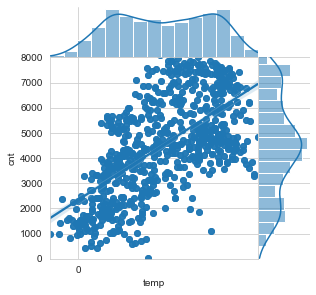

In [67]:
rj = sb.jointplot(x='temp', y='cnt', data=df1,
kind='reg', ylim=(0, 8000),
space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Alcohol - Quality', fontsize=12)

<AxesSubplot:xlabel='weathersit_1', ylabel='temp'>

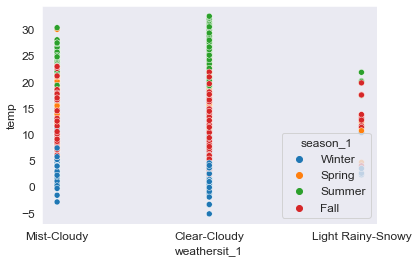

In [59]:
sb.scatterplot(data=ddf, x="weathersit_1", y="temp", hue="season_1")

## windspeed

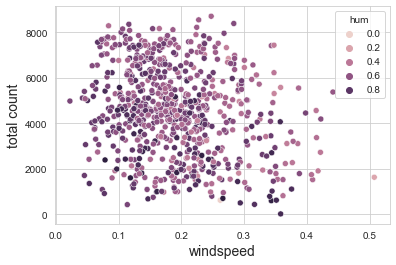

In [114]:
#markers = {"Spring": "s", "Winter": "s", "Fall": "X", "Summer" : "X"}
#sb.scatterplot(data=ddf, x="windspeed", y="cnt", hue="season_1")
clrs = ['#83bffb',  '#fcac59', 'orange', '#fdfdb1']
sb.scatterplot(data=ddf, x="windspeed", y="cnt",  hue = "hum") # markers=markers
plt.ylabel("total count", size=14)
plt.xlabel("windspeed", size=14);

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


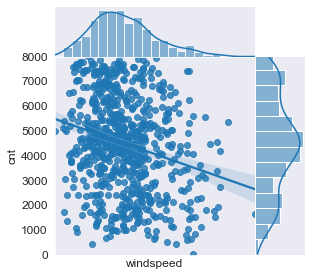

In [64]:
rj = sb.jointplot(x='windspeed', y='cnt', data=ddf,
kind='reg', ylim=(0, 8000),
space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Alcohol - Quality', fontsize=12)

Text(0.5, 0, 'months')

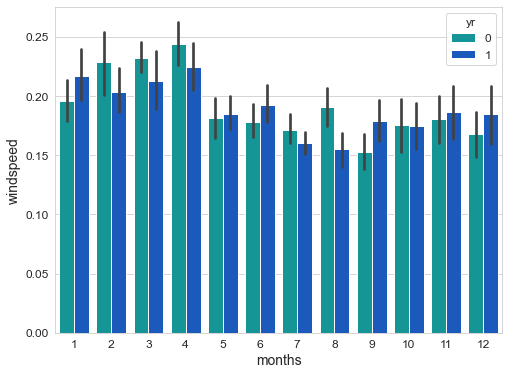

In [97]:
plt.figure(figsize=(8, 6))
sb.barplot(x="mnth", y="windspeed", data=df1, hue= "yr", palette="winter_r")
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("windspeed", size=14)
plt.xlabel("months", size=14)

----------------------------------------------------------------------------------------------------------------

## Weather

###### Since past, I have seen in Rainy days, we do not make much profits for obvious reasons. Can you provide us a statistics about contribution of weather in bike demands.

In [89]:
ddf["weathersit"].value_counts() 

1    463
2    247
3     21
Name: weathersit, dtype: int64

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,tmp_lvl,weathersit_1,season_1,weekday_1,workingday_1
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,...,0.805833,0.160446,331,654,985,warm,Mist-Cloudy,Winter,Saturday,Not Working Day
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,...,0.696087,0.248539,131,670,801,warm,Mist-Cloudy,Winter,Sunday,Not Working Day
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,...,0.437273,0.248309,120,1229,1349,cold,Clear-Cloudy,Winter,Monday,Workind Day
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,...,0.590435,0.160296,108,1454,1562,cold,Clear-Cloudy,Winter,Tuesday,Workind Day
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,...,0.436957,0.186900,82,1518,1600,cold,Clear-Cloudy,Winter,Wednesday,Workind Day


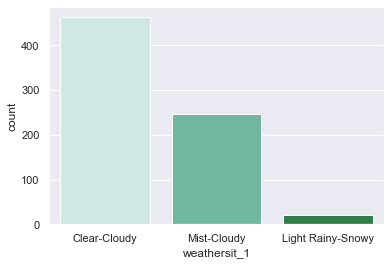

In [90]:
sb.countplot(x = "weathersit_1", data = ddf, palette = "BuGn", order = ["Clear-Cloudy", "Mist-Cloudy", "Light Rainy-Snowy"]) 

ddf.head()

(1100.0, 5200.0)

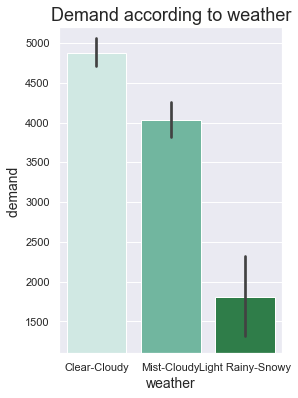

In [91]:
plt.figure(figsize=(4, 6))
sb.barplot(x= "weathersit_1", y="cnt",data=ddf, order = ["Clear-Cloudy", "Mist-Cloudy", "Light Rainy-Snowy"], palette= ("BuGn"))
plt.ylabel("demand ", size=14)
plt.xlabel("weather", size=14)
plt.title("Demand according to weather", size=18)
plt.ylim(ymax = 5200, ymin = 1100)
#sb.catplot(x="type", y="fixed acidity", kind="point", data=df_wines, hue="quality_type", palette= "Blues")
#plt.savefig("fixed Acidity type.png")  #to save the figure

In [92]:
weather_sit_group = ddf.groupby(['weathersit_1']).mean()
weather_sit_group ["cnt"]

weathersit_1
Clear-Cloudy         4876.786177
Light Rainy-Snowy    1803.285714
Mist-Cloudy          4035.862348
Name: cnt, dtype: float64

In [93]:
data_grp = ddf.groupby('weathersit_1')
data_Clear_Cloudy = data_grp.get_group("Clear-Cloudy")
data_Clear_Cloudy

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,tmp_lvl,weathersit_1,season_1,weekday_1,workingday_1
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,...,0.437273,0.248309,120,1229,1349,cold,Clear-Cloudy,Winter,Monday,Workind Day
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,...,0.590435,0.160296,108,1454,1562,cold,Clear-Cloudy,Winter,Tuesday,Workind Day
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,...,0.436957,0.186900,82,1518,1600,cold,Clear-Cloudy,Winter,Wednesday,Workind Day
5,6,2011-01-06,1,0,1,0,4,1,1,1.604356,...,0.518261,0.089565,88,1518,1606,cold,Clear-Cloudy,Winter,Thursday,Workind Day
8,9,2011-01-09,1,0,1,0,0,0,1,-1.498349,...,0.434167,0.361950,54,768,822,cold,Clear-Cloudy,Winter,Sunday,Not Working Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,718,2012-12-18,4,1,12,0,2,1,1,11.309151,...,0.666250,0.221404,433,5124,5557,warm,Clear-Cloudy,Fall,Tuesday,Workind Day
718,719,2012-12-19,4,1,12,0,3,1,1,7.627500,...,0.625417,0.184092,333,4934,5267,cold,Clear-Cloudy,Fall,Wednesday,Workind Day
721,722,2012-12-22,1,1,12,0,6,0,1,4.494151,...,0.441250,0.407346,205,1544,1749,cold,Clear-Cloudy,Winter,Saturday,Not Working Day
722,723,2012-12-23,1,1,12,0,0,0,1,3.554151,...,0.515417,0.133083,408,1379,1787,cold,Clear-Cloudy,Winter,Sunday,Not Working Day


In [94]:
x = data_Clear_Cloudy["cnt"].values.tolist()
#print (x)

In [95]:
data_grp = ddf.groupby('weathersit_1')
data_Mist_Cloudy  = data_grp.get_group("Mist-Cloudy")
data_Mist_Cloudy

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,tmp_lvl,weathersit_1,season_1,weekday_1,workingday_1
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,...,0.805833,0.160446,331,654,985,warm,Mist-Cloudy,Winter,Saturday,Not Working Day
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,...,0.696087,0.248539,131,670,801,warm,Mist-Cloudy,Winter,Sunday,Not Working Day
6,7,2011-01-07,1,0,1,0,5,1,2,1.236534,...,0.498696,0.168726,148,1362,1510,cold,Mist-Cloudy,Winter,Friday,Workind Day
7,8,2011-01-08,1,0,1,0,6,0,2,-0.245000,...,0.535833,0.266804,68,891,959,cold,Mist-Cloudy,Winter,Saturday,Not Working Day
10,11,2011-01-11,1,0,1,0,2,1,2,-0.052723,...,0.686364,0.122132,43,1220,1263,cold,Mist-Cloudy,Winter,Tuesday,Workind Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,725,2012-12-25,1,1,12,1,2,0,2,5.691288,...,0.734783,0.168726,440,573,1013,cold,Mist-Cloudy,Winter,Tuesday,Not Working Day
726,727,2012-12-27,1,1,12,0,4,1,2,3.945849,...,0.652917,0.350133,247,1867,2114,cold,Mist-Cloudy,Winter,Thursday,Workind Day
727,728,2012-12-28,1,1,12,0,5,1,2,3.906651,...,0.590000,0.155471,644,2451,3095,cold,Mist-Cloudy,Winter,Friday,Workind Day
728,729,2012-12-29,1,1,12,0,6,0,2,3.906651,...,0.752917,0.124383,159,1182,1341,cold,Mist-Cloudy,Winter,Saturday,Not Working Day


In [96]:
y = data_Mist_Cloudy["cnt"].values.tolist()
#print (y)

In [97]:
data_grp = ddf.groupby('weathersit_1')
data_rain = data_grp.get_group("Light Rainy-Snowy")
data_rain

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,tmp_lvl,weathersit_1,season_1,weekday_1,workingday_1
25,26,2011-01-26,1,0,1,0,3,1,3,2.222500,...,0.862500,0.293850,34,472,506,cold,Light Rainy-Snowy,Winter,Wednesday,Workind Day
68,69,2011-03-10,1,0,3,0,4,1,3,10.287277,...,0.000000,0.261877,46,577,623,warm,Light Rainy-Snowy,Winter,Thursday,Workind Day
89,90,2011-03-31,2,0,3,0,4,1,3,4.611651,...,0.918333,0.217646,179,1506,1685,cold,Light Rainy-Snowy,Spring,Thursday,Workind Day
105,106,2011-04-16,2,0,4,0,6,0,3,12.249151,...,0.888333,0.340808,121,674,795,warm,Light Rainy-Snowy,Spring,Saturday,Not Working Day
248,249,2011-09-06,3,0,9,0,2,1,3,17.380000,...,0.886957,0.343943,204,2506,2710,warm,Light Rainy-Snowy,Summer,Tuesday,Workind Day
249,250,2011-09-07,3,0,9,0,3,1,3,20.160849,...,0.917083,0.097021,118,1878,1996,warm,Light Rainy-Snowy,Summer,Wednesday,Workind Day
250,251,2011-09-08,3,0,9,0,4,1,3,21.793911,...,0.939565,0.192748,153,1689,1842,warm,Light Rainy-Snowy,Summer,Thursday,Workind Day
284,285,2011-10-12,4,0,10,0,3,1,3,17.536651,...,0.906250,0.248150,217,2199,2416,warm,Light Rainy-Snowy,Fall,Wednesday,Workind Day
291,292,2011-10-19,4,0,10,0,3,1,3,17.461733,...,0.895217,0.243339,254,2170,2424,warm,Light Rainy-Snowy,Fall,Wednesday,Workind Day
301,302,2011-10-29,4,0,10,0,6,0,3,3.945849,...,0.882500,0.351371,57,570,627,cold,Light Rainy-Snowy,Fall,Saturday,Not Working Day


In [98]:
z = data_rain["cnt"].values.tolist()
#print (z)

In [99]:
from scipy.stats import f_oneway
stat, pval = f_oneway(x, y, z)
print(pval)

3.106317270053755e-17


In [100]:
tstat, pval = ttest_ind(x, y)
pval

1.3098546508615235e-08

In [101]:
tstat, pval = ttest_ind(y, z)
pval

7.241695029624094e-08

In [102]:
tstat, pval = ttest_ind(x, z)
pval

5.446215924896285e-13

<AxesSubplot:xlabel='weathersit_1', ylabel='cnt'>

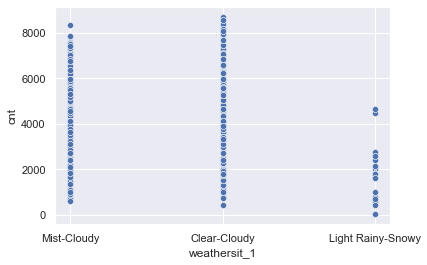

In [103]:
sb.scatterplot(data=df1, x="weathersit_1", y="cnt")

Text(0.5, 0, 'weather')

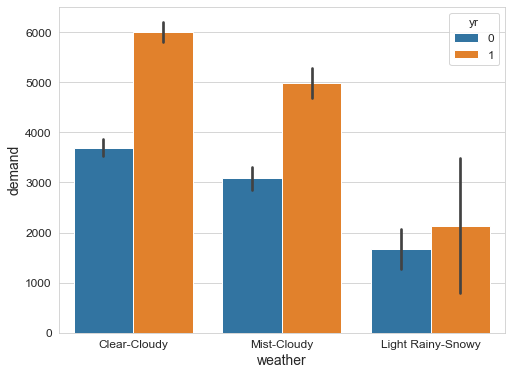

In [101]:
plt.figure(figsize=(8, 6))
sb.barplot(x="weathersit_1", y="cnt", data=ddf, order = ["Clear-Cloudy", "Mist-Cloudy", "Light Rainy-Snowy"], hue= "yr")
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("demand", size=14)
plt.xlabel("weather", size=14)